In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe=pd.read_csv('Churn_Modelling.csv')
dataframe.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
dataframe.dropna(inplace=True)
dataframe.reset_index(inplace=True,drop=True)
dataframe.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9998 non-null   int64  
 1   Geography        9998 non-null   object 
 2   Gender           9998 non-null   object 
 3   Age              9998 non-null   float64
 4   Tenure           9998 non-null   int64  
 5   Balance          9998 non-null   float64
 6   NumOfProducts    9998 non-null   int64  
 7   HasCrCard        9998 non-null   float64
 8   IsActiveMember   9998 non-null   float64
 9   EstimatedSalary  9998 non-null   float64
 10  Exited           9998 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.3+ KB


In [4]:
dataframe['Age']=dataframe['Age'].astype(int)
dataframe['HasCrCard']=dataframe['HasCrCard'].astype(int)
dataframe['IsActiveMember']=dataframe['IsActiveMember'].astype(int)
dataframe=dataframe.rename(columns={'Exited':'Churn'})
dataframe.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [5]:
from sklearn.preprocessing import OneHotEncoder

ohe_geo=OneHotEncoder()
array_geo=ohe_geo.fit_transform(dataframe[['Geography']]).toarray()

ohe_gender=OneHotEncoder()
array_gender=ohe_gender.fit_transform(dataframe[['Gender']]).toarray()

In [6]:
dataframe_geo=pd.DataFrame(array_geo,columns=ohe_geo.get_feature_names_out(['Geography']))
dataframe_geo.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [7]:
dataframe_gender=pd.DataFrame(array_gender,columns=ohe_gender.get_feature_names_out(['Gender']))
dataframe_gender.head()

,Gender_Female,Gender_Male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [8]:
dataframe=pd.concat([dataframe,dataframe_geo,dataframe_gender],axis=1)
dataframe.drop(['Geography','Gender'],axis=1,inplace=True)

In [9]:
dataframe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,645,44,8,113755.78,2,1,0,149756.71,1,0.0,0.0,1.0,0.0,1.0


In [10]:
#ploting and visulaization
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
dataframe=dataframe[dataframe['Age']<71]

<Axes: xlabel='Age', ylabel='Count'>

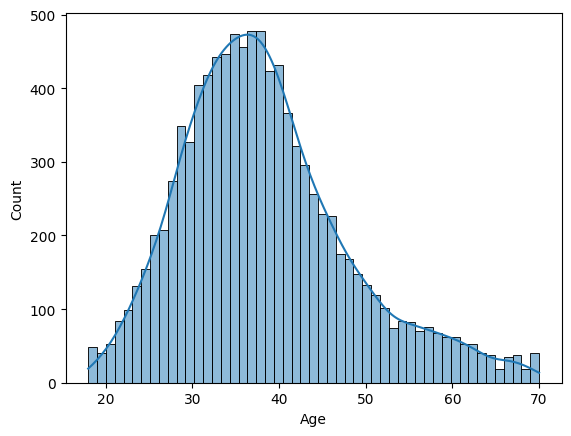

In [12]:
sb.histplot(dataframe['Age'],kde=True)

In [13]:
from scipy.stats import boxcox
reflected=dataframe['Age'].max() + 1-dataframe['Age']
tranfomed=boxcox(reflected)

<Axes: ylabel='Count'>

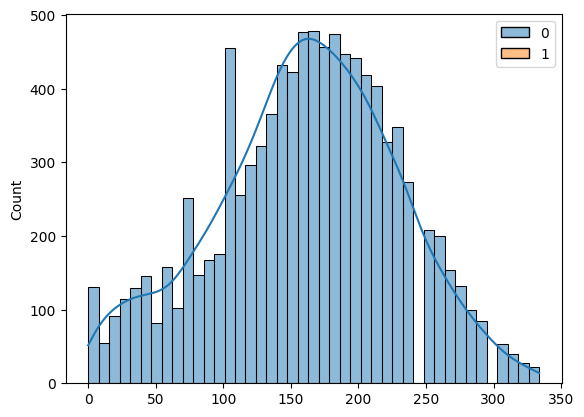

In [14]:
sb.histplot(tranfomed,kde=True)

<Axes: xlabel='Balance', ylabel='Count'>

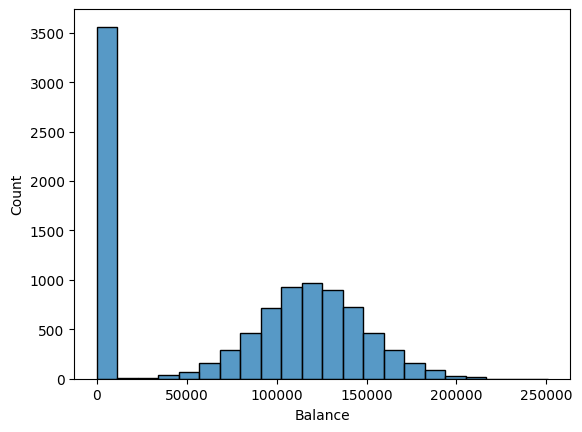

In [15]:
sb.histplot(dataframe['Balance'])

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

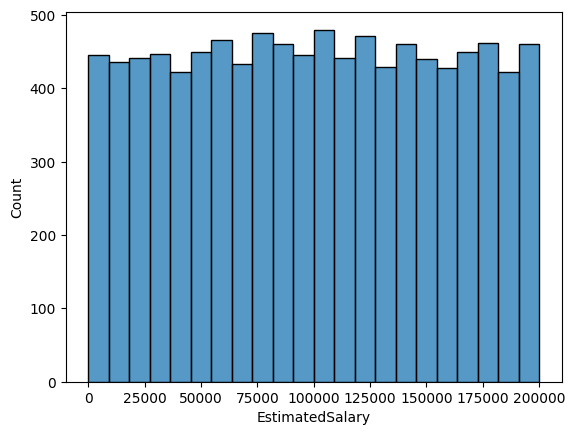

In [16]:
sb.histplot(dataframe['EstimatedSalary'])


In [17]:
dataframe[dataframe['Balance']==0]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.0,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
7,497,24,3,0.0,2,1,0,76390.01,0,0.0,0.0,1.0,0.0,1.0
8,476,34,10,0.0,2,1,0,26260.98,0,1.0,0.0,0.0,1.0,0.0
9,549,25,5,0.0,2,0,0,190857.79,0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,841,28,4,0.0,2,1,1,179436.60,0,0.0,0.0,1.0,0.0,1.0
9988,726,36,2,0.0,1,1,0,195192.40,0,0.0,0.0,1.0,0.0,1.0
9990,800,29,2,0.0,2,0,0,167773.55,0,1.0,0.0,0.0,1.0,0.0
9991,771,39,5,0.0,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0


In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(dataframe.drop(['Churn'],axis=1),dataframe['Churn'],test_size=0.3,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)


In [20]:
x_train.shape

(6905, 13)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
model = Sequential([
    Flatten(input_shape=(13,)),
    Dense(628, activation='relu'),
    Dropout(0.1),
    Dense(314, activation='relu'),
    Dropout(0.15),
    Dense(128, activation='relu'),
    Dropout(0.15),
    Dense(64, activation='relu'),
    Dropout(0.15),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


c:\Users\abhis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 628)            │         8,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 628)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 314)            │       197,506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 314)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        40,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,987 (1003.86 KB)

 Trainable params: 256,987 (1003.86 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(x_train,y_train,epochs=40
          ,batch_size=64)

Epoch 1/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7649 - loss: 0.5015
Epoch 2/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8459 - loss: 0.3807
Epoch 3/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8530 - loss: 0.3625
Epoch 4/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8622 - loss: 0.3425
Epoch 5/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8592 - loss: 0.3467
Epoch 6/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8614 - loss: 0.3351
Epoch 7/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8615 - loss: 0.3336
Epoch 8/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8639 - loss: 0.3264
Epoch 9/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8569 - loss: 0.3348
Epoch 10/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8693 - loss: 0.3299
Epoch 11/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8702 - loss: 0.3212
Epoch 12/40
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

In [25]:
model.save("model_trained.h5")

In [26]:
import joblib

# Save StandardScaler
joblib.dump(scale, 'scaler.pkl')

# Save OneHotEncoders
joblib.dump(ohe_geo, 'ohe_geo.pkl')
joblib.dump(ohe_gender, 'ohe_gender.pkl')


['ohe_gender.pkl']

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on training data
train_preds_prob = model.predict(x_train)
train_preds = (train_preds_prob > 0.5).astype(int).reshape(-1)

test_preds_prob = model.predict(x_test)
test_preds = (test_preds_prob > 0.5).astype(int).reshape(-1)

train_accuracy = accuracy_score(y_train, train_preds)
train_precision = precision_score(y_train, train_preds)
train_recall = recall_score(y_train, train_preds)
train_f1 = f1_score(y_train, train_preds)

test_accuracy = accuracy_score(y_test, test_preds)
test_precision = precision_score(y_test, test_preds)
test_recall = recall_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds)

print("Training Scores:")
print(f"Accuracy:  {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall:    {train_recall:.4f}")
print(f"F1 Score:  {train_f1:.4f}\n")

print("Testing Scores:")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1 Score:  {test_f1:.4f}")


216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training Scores:
Accuracy:  0.9198
Precision: 0.9405
Recall:    0.6577
F1 Score:  0.7741

Testing Scores:
Accuracy:  0.8466
Precision: 0.6766
Recall:    0.4264
F1 Score:  0.5231
